# 기말고사 : 감정분석 개인별 프로젝트 결과 보고서 제출


특정 관심 주제에 대하여 9주차 및 12주차 감정분석 사례를 참조하여 그와 유사하게 5단계를 거치면서 5가지 요구사항을 포함하여 관심 분야에 대한 자료를 수집/분석하여, 감정분석 결과를 제시하면서 해당 코드에 대한 설명과 분석결과에 대한 설명을 추가하여  10페이지 이내의 분석 결과 보고서와 코드를 제출하세요.

- 초안 발표(발표15점, 토론10점) : 12월 6일 또는 13일 중 지정일 개인별 10분

- 최종 보고서 제출 기한 : 12월 20일한

- 최종 보고서 제출 내용 : 1. 워드, 한글  또는 파워프인트 문서의 분석결과 보고서 본인의 이름으로 파일명 부여 : 김강남.hwp

                                       2. 파이썬 코드 : 김강남.ipynb (참고 확인용)

- 요구 사항(75점 각15점) :

1. 웹크롤링을 통하여 관심주제에 대한 데이터를 수집하고 수집한 내용과 코드 설명을 병행하여 제시하세요.

2. Konlpy 또는 정규표현식(re) 라이브러리를 이용하여 위에서 수집한 택스트 데이터에 대하여 전처리를 하고 적용한 절차와 코드를 설명하세요.

3. 긍정과 부정에 대한 워드크라우딩 결과를 비교 분석, wordcloud 라이브러리로 시각화하여 결과를 설명하세요.

4. 전처리 결과를 이용하여 로지스틱 회귀분석 또는 딥러닝에 의한 분류분석을 하고 해당 코딩과 결과에 대하여 설명하세요.

5. 위에서 분석한 결과를 Matplotlib 등으로 시각화하여 보여주고 설명하세요.   

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 82 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
# 폰트 설치
!apt-get update -qq # 나눔고딕 설치
!apt-get install fonts-nanum* -qq

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic')
mpl.font_manager._rebuild()

#데이터 준비

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
url_pre = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.naver?code=208077&type=after&onlyActualPointYn=N&onlySpoilerPointYn=Y&order=sympathyScore&page='
id_list = []
final_data = []
id_pre = '_filtered_ment_'

for page in range(20):
    site = url_pre+str(page+1)  # 1 ~ 20까지 변환됨.
    res = requests.get(site)

    soup = BeautifulSoup(res.content,'html.parser')

    score_list = []
    scores = soup.find_all('div','star_score')
    for score in scores:
        score_list.append(score.get_text())

    for i in range(10):
        id_list.append(id_pre+str(i))

    mydata = []
    for id in id_list:
        mydata.append(soup.find('span',{'id':id}).get_text())

    for score, line in zip(score_list, mydata):
        final_data.append([score.strip(), line.strip()])

df = pd.DataFrame(final_data)
df.columns = ['rating', 'text']
df

,rating,text
0,10,앤드류 가필드가 톰 홀랜드의 MJ를 무사히 구출하는 장면이어메이징 스파이더맨에서 그...
1,10,원하는거 다 보여줌 ㅋㅋㅋㅋ
2,8,잼민이새끼 개빡치네. 내가 닥스였으면 혈압 터져서 죽었음
3,10,You are amazing!
4,8,계속 잔상처럼 남아있는 앤드류가 떨어지는 MJ를 구하고 나서 눈물 맺힌 눈
...,...,...
195,10,3스파 나올때 진짜 쌀뻔했다..
196,10,추억의 스파이더맨이 전부....꿈같은 영화 였습니다.
197,10,너무 재밌음!!! 빌런들도 구하려고 하는 불살주의 히어로 스파이더맨 너무 멋지다
198,10,크리스마스 종합 선물세트 같은 영화


In [ ]:
# 전체 데이터와 결측치 확인
print(df.shape)
# df.isnull().sum()
df.info()

(200, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  200 non-null    object
 1   text    200 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


10    142
9      21
8      19
2       5
7       5
6       3
1       3
5       1
4       1
Name: rating, dtype: int64


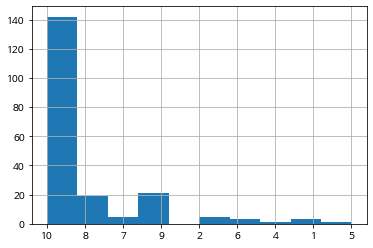

In [ ]:
# 점수별 현황
print(df['rating'].value_counts())
df['rating'].hist()

In [ ]:
# 점수를 기준으로 긍정(8-10)과 부정(1-7)으로 변환
def rating_to_label(rating):
    if int(rating) > 7: # str 형태의 rating을 int()
        return 1
    else:
        return 0

df['y'] = df['rating'].apply(lambda x: rating_to_label(x))

In [ ]:
# 긍정 및 부정평가 댓글 수
df["y"].value_counts()

1    182
0     18
Name: y, dtype: int64

#한국어 텍스트 데이터 전처리

In [ ]:
# 한글 불용어 사전 다운
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
# stopwords[:10]
# 형태 조정, 특별한 용어 추가 불용어
stopwords=[x[0]  for x in stopwords]

# stopwords 추가
df_stopwords = ['ㅋ', '.', ',', 'ㅠ', 'ㅜ', '!', '?', '홀렌드', '스파이더맨', 'MJ', '주인공', '피터', '빌런', '토비', '앤드류', '영화', '마블', '잼민', '새끼']
for word in df_stopwords:
    stopwords.append(word)
print(stopwords)

['휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를 들면', '예를 들자면', '저', '소인', '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수 없다', '해서는 안된다', '뿐만 아니라', '만이 아니다', '만은 아니다', '막론하고', '관계없이', '그치지 않다', '그러나', '그런데', '하지만', '든간에', '논하지 않다', '따지지 않다', '설사', '비록', '더라도', '아니면', '만 못하다', '하는 편이 낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이 외에', '이 밖에', '하여야', '비로소', '한다면 몰라도', '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할 생각이다', '하려고하다', '이리하여', '그리하여', '그렇게 함으로써', '하지만', '일때', '할때', '앞에서', '중에서', '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다', '할수있어', '임에 틀림없다', '한다면', '등', '등등', '제', '겨우', '단지', '다만', '할뿐', '딩동', '댕그', '대해서', '대하여', '대하면', '훨씬', '얼마나', '얼마만큼', '얼마큼', '남짓', '여', '얼마간', '약간', '다소', '좀', '조금', '다수', '몇', '얼마', '지만', '하물며', '또한', '그러나', '그렇지만', '하지만', '이외에도', '대해 말하자면', '뿐이다', '다음에', '반대로', '반대로 말하자면', '이와 반대로', '바꾸어

In [ ]:
!pip install konlpy

In [ ]:
import konlpy
tagger = konlpy.tag.Okt()

tokens=[]
corpus =[]

for i, sentence in enumerate(df['text']):
    para = tagger.nouns(sentence)
    para = [x for x in para if x not in stopwords] # 불용어 제거
    para = [x for x in para if len(x) > 1]
    tokens.append(para)
    corpus.append(' '.join(para))

print(corpus[:5])
print(tokens[:5])


['가필드 홀랜드 구출 장면 어메이징 장면 눈물 장면', '', '닥스였으 혈압', '', '계속 눈물 맺힌']
[['가필드', '홀랜드', '구출', '장면', '어메이징', '장면', '눈물', '장면'], [], ['닥스였으', '혈압'], [], ['계속', '눈물', '맺힌']]


# 긍정(1)과 부정(0)

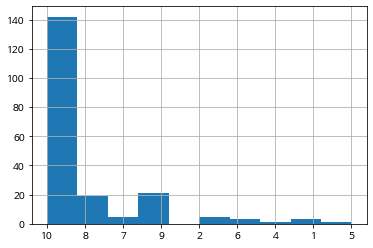

In [ ]:
# 점수별 빈도수
df['rating'].hist()

In [ ]:
# 긍정 평가와 부정평가 토큰을 분리하여 저장
print(df[:5])
print(df.loc[df['y']==0,][:5])
tokens_p, tokens_n = [],[]
for i, token in enumerate(tokens):

  if df['y'].values[i]== 1:  # 주의 : df['y'][i] 값을 사용하면 기존 index가 참조되어서 값이 다름
    tokens_p.append(token)
  else :
    tokens_n.append(token)

print(tokens_p)
print(tokens_n)

  rating                                               text  y
0     10  앤드류 가필드가 톰 홀랜드의 MJ를 무사히 구출하는 장면이어메이징 스파이더맨에서 그...  1
1     10                                    원하는거 다 보여줌 ㅋㅋㅋㅋ  1
2      8                    잼민이새끼 개빡치네. 내가 닥스였으면 혈압 터져서 죽었음  1
3     10                                   You are amazing!  1
4      8          계속 잔상처럼 남아있는 앤드류가 떨어지는 MJ를 구하고 나서 눈물 맺힌 눈  1
    rating                                               text  y
11       7                  버튼 눌렀으면 이모 죽을 일도 없잖아....중간에 좀 답답함  0
18       2  스토리 때문에 몰입이 안됐다. 정의의 사도인것 마냥 죽을 운명인 빌런들을 살리겠다며...  0
106      6               이전 스파이더맨들을 다시 볼 수 있었던 건 좋았지만 그것만 좋았다  0
107      7  스토리는 스포아닌스포로 이미 예상가능했지만 스파이더맨팬들에게 선물같은 영화인건 확실...  0
109      7  마블 영화를 원만한 건 다 챙겨 보았지만, 이번 영화는 실망이었다.스토리 전개가.....  0
[['가필드', '홀랜드', '구출', '장면', '어메이징', '장면', '눈물', '장면'], [], ['닥스였으', '혈압'], [], ['계속', '눈물', '맺힌'], ['어벤저스', '선배', '과제', '파커', '하드캐리', '명작'], ['원래', '자리'], ['그린고블린', '캐리', '샌드맨', '갱생', '갑자기', '공격', '납득'], ['감독', '그냥', '준비'], ['오마주', 

In [ ]:
# counter 함수에 넣기위한 전처리 : 토큰단위 리스트로
corpus_n, corpus_p = [], []
for token in tokens_p:
  corpus_p.append(' '.join(token))
for token in tokens_n:
  corpus_n.append(' '.join(token))
# 모든 리뷰를 긍정 부정 하나의 corpus로 합치기
corpus_p1 = ' '.join(corpus_p).split()
corpus_n1 = ' '.join(corpus_n).split()
print(corpus_p1)

['가필드', '홀랜드', '구출', '장면', '어메이징', '장면', '눈물', '장면', '닥스였으', '혈압', '계속', '눈물', '맺힌', '어벤저스', '선배', '과제', '파커', '하드캐리', '명작', '원래', '자리', '그린고블린', '캐리', '샌드맨', '갱생', '갑자기', '공격', '납득', '감독', '그냥', '준비', '오마주', '장면', '꼬맹이', '시절', '상상', '만남', '장면', '연기', '업혔던', '영웅', '히어로', '신념', '대가', '어벤져스', '포탈', '두번째', '포탈', '소름', '수가', '그냥', '존나', '진짜', '재미', '진짜', '이해', '가요', '지금', '부작', '보신', '이정', '스토리', '라인', '진짜', '정말', '감탄사', '연발', '인생', '형님', '정말', '과정', '개봉', '사람', '전율', '슬픔', '기쁨', '등장인물', '자칫', '스토리', '이보', '마무리', '세번', '진짜', '어메이징', '스파이더', '때매', '장면', '진짜', '최고', '그냥', '사람', '라면', '보고', '추천', '래야', '포인트', '오마주', '관객', '육성', '놀람', '울음', '포인트', '아필락좌', '제이', '못구', '모습', '부분', '개봉', '종합', '선물', '세트', '경력', '이유', '유치원', '생때', '열차', '위해', '노력', '얼굴', '모습', '어린시절', '과언', '감동', '스파', '메리제인', '중간', '중간', '마지막', '장면', '여운', '아이언맨', '지원', '최첨단', '진정', '홀로', '이웃', '다시', '느낌', '기대', '이제', '진짜', '마지막', '봉틀', '보고', '가슴', '나름', '스타크', '기술', '역사', '방식', '스파', '전율', '슬픔', '앤드', '게임', '쵝오', '시리즈', '사람', '한

In [ ]:
# 빈도 탐색
from collections import Counter
counter_p = Counter(corpus_p1)
counter_n = Counter(corpus_n1)
print(counter_p.most_common(10))
print(counter_n.most_common(10))

[('스파', 26), ('진짜', 24), ('눈물', 14), ('최고', 14), ('보고', 14), ('선물', 14), ('시리즈', 14), ('어스', 14), ('감동', 13), ('파커', 12)]
[('스토리', 8), ('중간', 5), ('노잼', 4), ('부분', 3), ('전개', 3), ('억지', 3), ('감동', 3), ('사람', 3), ('내용', 3), ('이모', 2)]


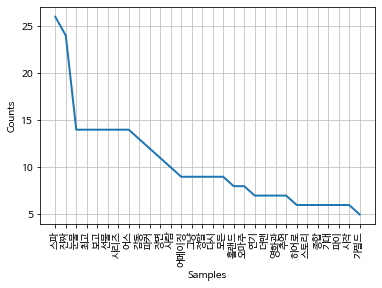

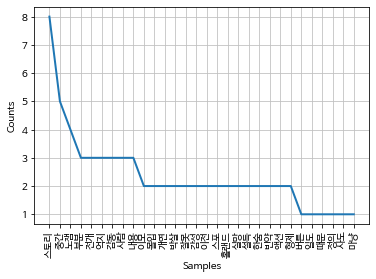

In [ ]:
# nltk 라이브러리 활용
import nltk
import matplotlib.pyplot as plt
pos = nltk.Text(corpus_p1)
neg = nltk.Text(corpus_n1)
plt.rc('font', family='NanumBarunGothic')

plt.figure(1)
pos.plot(30)

plt.figure(2)
neg.plot(30)
plt.show()

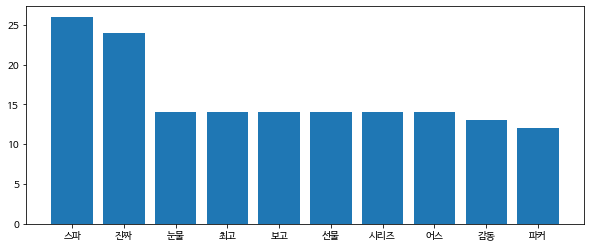

In [ ]:
top_10 = counter_p.most_common(10)

plt.figure(figsize=(10, 4))
plt.rc('font', family="NanumBarunGothic")
plt.rcParams["axes.unicode_minus"] = False # 한글 폰트 사용시 - 깨지는 문제 해결
plt.bar(range(len(top_10)), [val[1] for val in top_10])
plt.xticks(range(len(top_10)), [val[0] for val in top_10])
plt.show()

In [ ]:
# DTM 구하기, corpus 문서단위 * 단어사전 3482개 매트릭스
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import gensim
g_dictionary = gensim.corpora.Dictionary(tokens)
g_corpus = [g_dictionary.doc2bow(text) for text in tokens]
vector = CountVectorizer(vocabulary=g_dictionary.token2id)
dtm = vector.fit_transform(corpus).toarray()
col = g_dictionary.token2id.keys()
print(dtm.shape)
pd.DataFrame(dtm, columns=col)

(200, 526)


,가필드,구출,눈물,어메이징,장면,홀랜드,닥스였으,혈압,계속,맺힌,과제,명작,선배,어벤저스,파커,하드캐리,원래,자리,갑자기,갱생,공격,그린고블린,납득,샌드맨,캐리,감독,그냥,준비,오마주,꼬맹이,만남,상상,시절,버튼,이모,일도,중간,연기,업혔던,영웅,...,마리,오줌,참고,하늘,레전드,아필락굿형님,홀려,간만,귀가,문어,아저씨,지심,짱짱맨,또울,만날,머리,나오니,결투,목구멍,비명,원조,진심,가치,강조,세계관,아픔,종류,지불,출연,한편,허리,불살,주의,미드타운,복장,스크린,요소,중심,형제,활약
0,1,1,1,1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
196,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
198,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# TF-IDF 변환
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_vectorizer = TfidfTransformer()
tf_idf = tfidf_vectorizer.fit_transform(dtm).toarray()
col = g_dictionary.token2id.keys()
print(tf_idf.shape)
pd.DataFrame(tf_idf, columns=col)

(200, 526)


,가필드,구출,눈물,어메이징,장면,홀랜드,닥스였으,혈압,계속,맺힌,과제,명작,선배,어벤저스,파커,하드캐리,원래,자리,갑자기,갱생,공격,그린고블린,납득,샌드맨,캐리,감독,그냥,준비,오마주,꼬맹이,만남,상상,시절,버튼,이모,일도,중간,연기,업혔던,영웅,...,마리,오줌,참고,하늘,레전드,아필락굿형님,홀려,간만,귀가,문어,아저씨,지심,짱짱맨,또울,만날,머리,나오니,결투,목구멍,비명,원조,진심,가치,강조,세계관,아픔,종류,지불,출연,한편,허리,불살,주의,미드타운,복장,스크린,요소,중심,형제,활약
0,0.290362,0.361069,0.235830,0.264266,0.772457,0.251351,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107,0.707107,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.440876,0.000000,0.000000,0.000000,0.000000,0.000000,0.591606,0.675004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
196,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
197,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.614678,0.614678,0.000000,0.000000,0.000000,0.000000,0.000000,

In [ ]:
# DTM을 이용한 문서 유사도 평가
from numpy import dot
from numpy.linalg import norm
import numpy as np
def cos_sim(A, B):
       return dot(A, B)/(norm(A)*norm(B))

In [ ]:
# LDA 모형 적합, g_dictionary 사전 만들고, g_corpus(word, count)로 정리하고, ldamodel 객체 생성 (토픽4)
import gensim
g_dictionary = gensim.corpora.Dictionary(tokens)
g_corpus = [g_dictionary.doc2bow(text) for text in tokens]
ldamodel = gensim.models.ldamodel.LdaModel(corpus=g_corpus, id2word=g_dictionary, num_topics=4, passes=15)
print(ldamodel.print_topics())

[(0, '0.034*"진짜" + 0.028*"파커" + 0.024*"스파" + 0.018*"더맨" + 0.015*"시리즈" + 0.015*"파이" + 0.010*"등장" + 0.010*"추억" + 0.008*"사람" + 0.008*"웨이"'), (1, '0.026*"어스" + 0.021*"스파" + 0.019*"보고" + 0.019*"감동" + 0.018*"눈물" + 0.015*"장면" + 0.013*"시리즈" + 0.013*"오마주" + 0.011*"시작" + 0.011*"정말"'), (2, '0.026*"최고" + 0.025*"선물" + 0.022*"진짜" + 0.019*"스파" + 0.015*"연기" + 0.015*"그냥" + 0.014*"종합" + 0.012*"사람" + 0.012*"어메이징" + 0.012*"엔드게임"'), (3, '0.017*"스토리" + 0.017*"중간" + 0.014*"보고" + 0.011*"다시" + 0.011*"히어로" + 0.011*"맥과이어" + 0.011*"노잼" + 0.011*"눈물" + 0.011*"이모" + 0.007*"이전"')]


In [ ]:
!pip install wordcloud

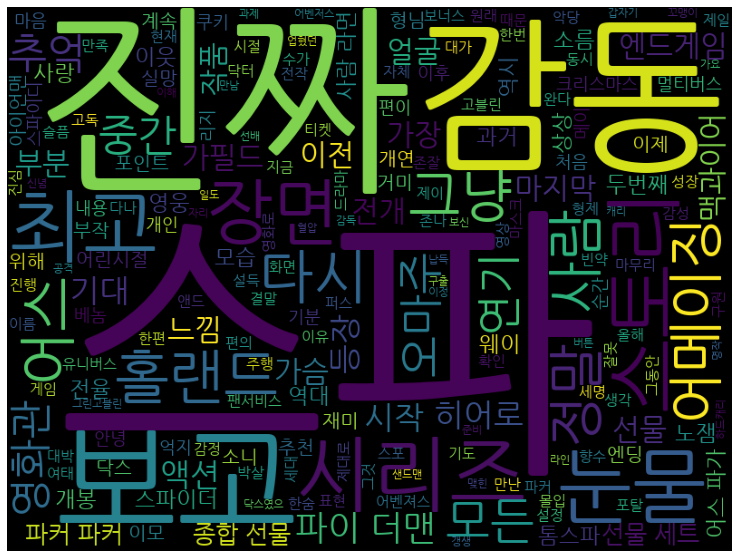

In [ ]:
# 전체 키워드 워드크라우딩
# 긍부정 워드크라우딩은 뒷쪽에**

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(font_path = fontpath,
                      stopwords = stopwords,
                      background_color = 'black', #배경색
                      width = 800,
                      height = 600).generate(' '.join(corpus))

plt.figure(figsize = (15, 10)) # 각각 가로 세로 인치 입니다.
plt.axis("off") # 축에 표시되는 눈금을 제거하는 옵션
plt.imshow(wordcloud) # 이미지가 표시되도록 하는 옵션.
plt.show() # 최종으로 보여주는 옵션.

In [ ]:
# id_to_word
print(vector.vocabulary_)
id_to_word = {v: k for k, v in vector.vocabulary_.items()}
print(id_to_word)
print(id_to_word[10])

{'가필드': 0, '구출': 1, '눈물': 2, '어메이징': 3, '장면': 4, '홀랜드': 5, '닥스였으': 6, '혈압': 7, '계속': 8, '맺힌': 9, '과제': 10, '명작': 11, '선배': 12, '어벤저스': 13, '파커': 14, '하드캐리': 15, '원래': 16, '자리': 17, '갑자기': 18, '갱생': 19, '공격': 20, '그린고블린': 21, '납득': 22, '샌드맨': 23, '캐리': 24, '감독': 25, '그냥': 26, '준비': 27, '오마주': 28, '꼬맹이': 29, '만남': 30, '상상': 31, '시절': 32, '버튼': 33, '이모': 34, '일도': 35, '중간': 36, '연기': 37, '업혔던': 38, '영웅': 39, '대가': 40, '신념': 41, '히어로': 42, '어벤져스': 43, '두번째': 44, '소름': 45, '수가': 46, '포탈': 47, '가요': 48, '라인': 49, '보신': 50, '부작': 51, '스토리': 52, '이정': 53, '이해': 54, '재미': 55, '존나': 56, '지금': 57, '진짜': 58, '감성': 59, '개연': 60, '도시': 61, '때문': 62, '마냥': 63, '몰입': 64, '박살': 65, '보고': 66, '부분': 67, '뻘짓하': 68, '사도': 69, '성은': 70, '운명': 71, '잘못': 72, '정의': 73, '질질': 74, '감탄사': 75, '연발': 76, '인생': 77, '정말': 78, '형님': 79, '과정': 80, '개봉': 81, '기쁨': 82, '등장인물': 83, '사람': 84, '슬픔': 85, '이보': 86, '자칫': 87, '전율': 88, '마무리': 89, '때매': 90, '세번': 91, '스파이더': 92, '최고': 93, '관객': 94, '놀람': 95, '라면': 96, '래야': 97,

# 로지스틱 회귀 감정분석

In [ ]:
# data 로 종합 데이터 형성
X = tf_idf
y=df['y']
data = pd.concat([y,pd.DataFrame(X)], axis=1)

In [ ]:
# 전체 데이터를 train 데이터 70%, test 데이터 30%로 분리
from sklearn.model_selection import train_test_split

train_df,test_df = train_test_split(data, test_size = 0.3, random_state=256)
train_df.head()

,y,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525
158,1,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49,1,0.0,0.0,0.000000,0.0,0.0,0.1969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47,1,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.203772,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
170,1,0.0,0.0,0.217285,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.751409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 데이터 설정 맞추기
x_train = train_df.drop(['y'], axis=1)
y_train = train_df['y']
x_test = test_df.drop(['y'], axis=1)
y_test = test_df['y']

In [ ]:
# 모델 학습
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in training set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# predict in test set
y_pred = lr.predict(x_test)

In [ ]:
# classification result for test set
a1 = accuracy_score(y_test, y_pred)
p1 = precision_score(y_test, y_pred)
r1 =recall_score(y_test, y_pred)
f1= f1_score(y_test, y_pred)
print('accuracy: %.2f' % a1 )
print('precision: %.2f' % p1)
print('recall: %.2f' % r1)
print('F1: %.2f' % f1)

accuracy: 0.95
precision: 0.95
recall: 1.00
F1: 0.97


In [ ]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


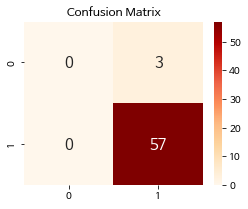

In [ ]:
# confusion matrix, 데이터 불균형에 의한 과적합

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#sampling 재조정
df['y'].value_counts()

1    182
0     18
Name: y, dtype: int64

In [ ]:
# under-sampling 방법으로 불균형 해소
positive_random_idx = df[df['y']==1].sample(100, random_state=12).index.tolist()
negative_random_idx = df[df['y']==0].sample(11, random_state=12).index.tolist()

In [ ]:
random_idx = positive_random_idx + negative_random_idx
x = tf_idf[random_idx]
y = df['y'][random_idx]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [ ]:
x_train.shape, y_train.shape

((83, 526), (83,))

In [ ]:
x_test.shape, y_test.shape

((28, 526), (28,))

In [ ]:
lr2 = LogisticRegression(random_state = 0)
lr2.fit(x_train, y_train)
y_pred = lr2.predict(x_test)

In [ ]:
# classification result for test set
a2 = accuracy_score(y_test, y_pred)
p2 = precision_score(y_test, y_pred)
r2 =recall_score(y_test, y_pred)
f2= f1_score(y_test, y_pred)
print('accuracy: %.2f' % a2 )
print('precision: %.2f' % p2)
print('recall: %.2f' % r2)
print('F1: %.2f' % f2)

accuracy: 0.93
precision: 0.93
recall: 1.00
F1: 0.96


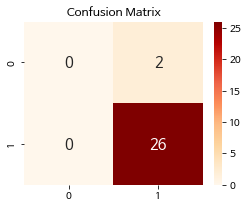

In [ ]:
# 개선... 되지 않은ㅠㅠㅜㅠ confusion matrix

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# 분류 정확도 test_result
pd.options.display.float_format = '{:.2f}'.format
tr1 = pd.DataFrame([a1,p1,r1,f1])
tr2 = pd.DataFrame([a2,p2,r2,f2])

test_result = pd.concat([tr1.T, tr2.T], axis=0)
test_result.columns=['Accuracy(정확도)', 'Precision(정밀도)', 'Recall(재현율)', 'F1']
test_result.index = ['1차 Imbalance Data', '2차 Under-sampling']
test_result



,Accuracy(정확도),Precision(정밀도),Recall(재현율),F1
1차 Imbalance Data,0.95,0.95,1.00,0.97
2차 Under-sampling,0.93,0.93,1.00,0.96


# 긍 / 부정 키워드 분석

In [ ]:
# 긍정/부정 키워드 추출 긍 / 부정 키워드를 추출 coeficient를 시각화
lr2.coef_

array([[ 0.        ,  0.        ,  0.09015779,  0.05052766,  0.21260567,
         0.0413105 ,  0.06630751,  0.06630751,  0.        ,  0.        ,
         0.03900228,  0.03900228,  0.03900228,  0.03900228,  0.09982277,
         0.03900228, -0.12076137,  0.07656978,  0.03544285,  0.03544285,
         0.03544285,  0.03544285,  0.03544285,  0.03544285,  0.03544285,
         0.05733919,  0.12573164,  0.05733919,  0.13537862,  0.04871908,
         0.04871908,  0.09403146,  0.04519799, -0.4071786 , -0.3568708 ,
        -0.4071786 , -1.04156727,  0.14128969,  0.0816595 , -0.17156867,
         0.        ,  0.        ,  0.05115116,  0.09377298, -0.20043531,
         0.08320306,  0.03658352,  0.07886704,  0.        ,  0.        ,
         0.        ,  0.02397516, -0.80429009,  0.        ,  0.        ,
         0.        ,  0.        ,  0.02881107, -0.02921379, -0.26599788,
        -0.1687125 ,  0.        ,  0.        ,  0.        , -0.25883187,
         0.        ,  0.08662194, -0.26958045,  0. 

<BarContainer object of 526 artists>

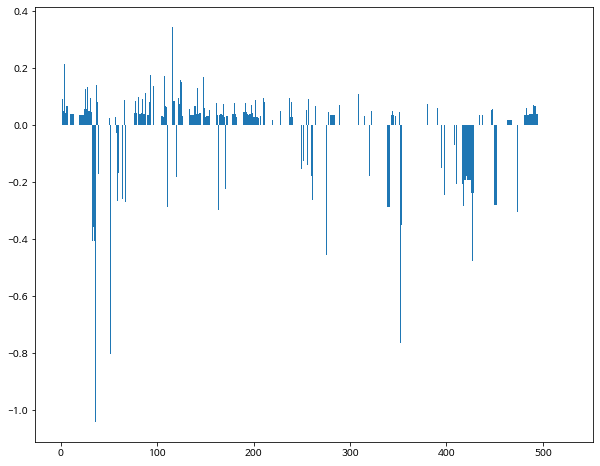

In [ ]:
# print logistic regression's coef

plt.figure(figsize=(10, 8))
plt.bar(range(len(lr2.coef_[0])), lr2.coef_[0])

In [ ]:
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[-5:])
# enumerate: 인덱스 번호와 컬렉션의 원소를 tuple형태로 반환함

[(0.34522453260782154, 116), (0.2794184537907073, 103), (0.21260566548321422, 4), (0.1773890919396728, 93), (0.1723620180462888, 108)]
[(-0.4755272308100213, 427), (-0.5410607714834589, 355), (-0.7657818014682506, 352), (-0.8042900878778855, 52), (-1.0415672692257254, 36)]


In [ ]:
# 일부 중요 원소들 단어사전 확인
print('긍정리뷰 키워드: ', id_to_word[80],id_to_word[93])
print('부정리뷰 키워드: ', id_to_word[418],id_to_word[250])

긍정리뷰 키워드:  과정 최고
부정리뷰 키워드:  한숨 이전


In [ ]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = False)
coef_pos_index

[(0.34522453260782154, 116),
 (0.2794184537907073, 103),
 (0.21260566548321422, 4),
 (0.1773890919396728, 93),
 (0.1723620180462888, 108),
 (0.16756872897731043, 148),
 (0.15884856654770596, 124),
 (0.1519020578153026, 125),
 (0.14359466592611683, 104),
 (0.1412896900820043, 37),
 (0.13702201059017982, 96),
 (0.13537862476054285, 28),
 (0.12964797188478264, 142),
 (0.1257316430721863, 26),
 (0.11356610292985732, 88),
 (0.10944797137469228, 309),
 (0.09982277407519038, 14),
 (0.09749045493754205, 81),
 (0.09519187548905787, 122),
 (0.09403146117834293, 31),
 (0.09377297803032868, 237),
 (0.09377297803032868, 210),
 (0.09377297803032868, 43),
 (0.09137412583113581, 257),
 (0.0905741408214557, 85),
 (0.0901577937472641, 2),
 (0.08780837515216544, 202),
 (0.08662193916360406, 66),
 (0.08576377086062813, 118),
 (0.08418424700661578, 78),
 (0.08348701657099034, 117),
 (0.08320305910813305, 45),
 (0.08165949743030224, 38),
 (0.08158728186879198, 239),
 (0.08112130226072435, 128),
 (0.08101255

In [ ]:
#  index를 단어로 변환하여 "긍정 키워드 리스트"와 "부정 키워드 리스트"의 Top 20 단어를 출력
invert_index_vectorizer = id_to_word

In [ ]:
pos_top_word=[]
pos_top_score=[]
for coef in coef_pos_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])
    pos_top_word.append(invert_index_vectorizer[coef[1]])
    pos_top_score.append(coef[0])

스파 0.34522453260782154
선물 0.2794184537907073
장면 0.21260566548321422
최고 0.1773890919396728
종합 0.1723620180462888
어스 0.16756872897731043
다시 0.15884856654770596
마지막 0.1519020578153026
세트 0.14359466592611683
연기 0.1412896900820043
라면 0.13702201059017982
오마주 0.13537862476054285
시리즈 0.12964797188478264
그냥 0.1257316430721863
전율 0.11356610292985732
맥과이어 0.10944797137469228
파커 0.09982277407519038
개봉 0.09749045493754205
기대 0.09519187548905787
상상 0.09403146117834293


In [ ]:
neg_top_word=[]
neg_top_score=[]

for coef in coef_neg_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])
    neg_top_word.append(invert_index_vectorizer[coef[1]])
    neg_top_score.append(coef[0])

중간 -1.0415672692257254
스토리 -0.8042900878778855
노잼 -0.7657818014682506
억지 -0.5410607714834589
빈약 -0.4755272308100213
전개 -0.45493431523833994
버튼 -0.4071786031717526
일도 -0.4071786031717526
내용 -0.38359438666201323
스트레인저 -0.3795700753014517
설득 -0.37038064688901334
이모 -0.35687080177261965
닥터 -0.35213725984559585
만들기 -0.30441130817764356
먹기 -0.30441130817764356
연말 -0.30441130817764356
지수 -0.30441130817764356
신파 -0.29793653213744015
연성 -0.29793653213744015
지룹댱 -0.29793653213744015


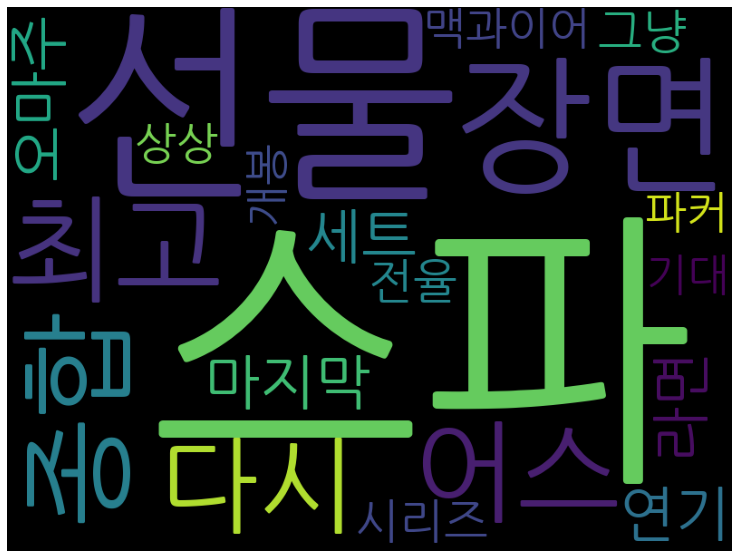

In [ ]:
#긍정 워드클라우드
wordcloud = WordCloud(font_path = fontpath,
                      stopwords = stopwords,
                      background_color = 'black', #배경색
                      width = 800,
                      height = 600).generate(' '.join(pos_top_word))

plt.figure(figsize = (15, 10)) # 각각 가로 세로 인치 입니다.
plt.axis("off") # 축에 표시되는 눈금을 제거하는 옵션
plt.imshow(wordcloud) # 이미지가 표시되도록 하는 옵션.
plt.show() # 최종으로 보여주는 옵션.

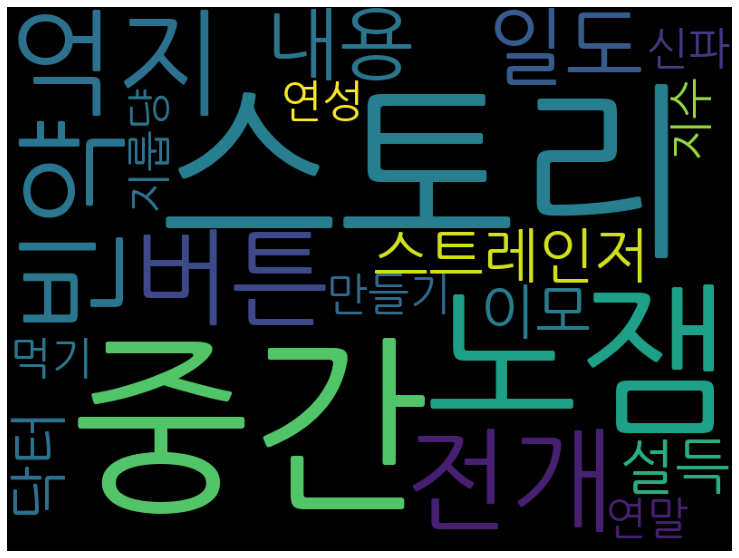

In [ ]:
#부정 워드클라우드
wordcloud = WordCloud(font_path = fontpath,
                      stopwords = stopwords,
                      background_color = 'black', #배경색
                      width = 800,
                      height = 600).generate(' '.join(neg_top_word))

plt.figure(figsize = (15, 10)) # 각각 가로 세로 인치 입니다.
plt.axis("off") # 축에 표시되는 눈금을 제거하는 옵션
plt.imshow(wordcloud) # 이미지가 표시되도록 하는 옵션.
plt.show() # 최종으로 보여주는 옵션.

In [ ]:
pos_top_word.reverse()
pos_top_score.reverse()
top_word=neg_top_word+ pos_top_word
top_score = neg_top_score+ pos_top_score

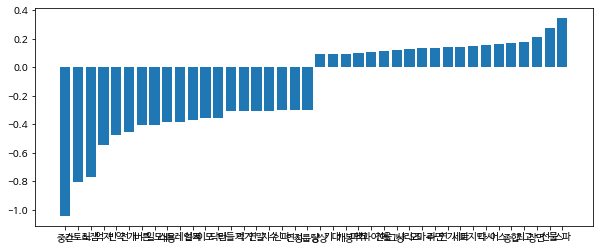

In [ ]:
plt.figure(figsize=(10, 4))
plt.rc('font', family="NanumBarunGothic")
plt.rcParams["axes.unicode_minus"] = False # 한글 폰트 사용시 - 깨지는 문제 해결

plt.bar(neg_top_word, neg_top_score, label = "부정", color = 'r')
plt.bar(pos_top_word, pos_top_score, label = "긍정", color = 'g')

plt.bar(range(len(top_score)), top_score)
plt.xticks(range(len(top_word)), top_word)
plt.show()


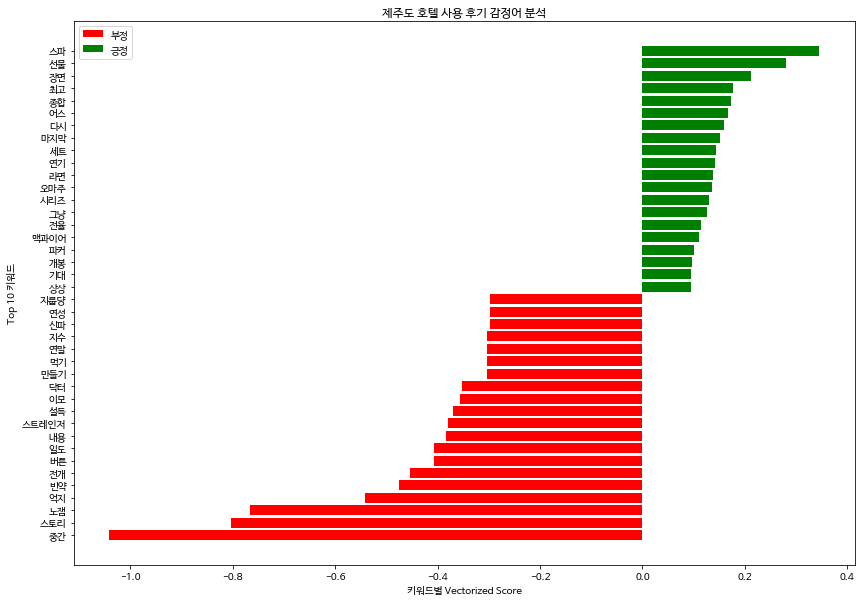

In [ ]:
# 감정분석 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=[14, 10])
plt.barh(neg_top_word, neg_top_score, label = "부정", color = 'r')
plt.barh(pos_top_word, pos_top_score, label = "긍정", color = 'g')
plt.legend()
plt.xlabel('키워드별 Vectorized Score')
plt.ylabel('Top 10 키워드')
# Giving the tilte for the plot
plt.title('제주도 호텔 사용 후기 감정어 분석')
# Saving the plot as a 'png'
plt.savefig('2BarPlot.png')
# Displaying the bar plot
plt.show()

Text(0.5, 0.98, 'Categorical Plotting')

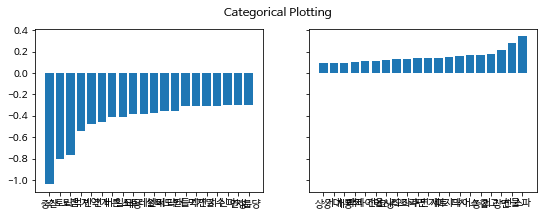

In [ ]:
# 약간 다르게 시각화
import matplotlib.pyplot as plt

data1 = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names1 = list(data1.keys())
values1 = list(data1.values())

data2 = {'apple': 1, 'orange': 5, 'lemon': 15, 'lime': 25}
names2 = list(data2.keys())
values2 = list(data2.values())

fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=True)
axs[0].bar(neg_top_word, neg_top_score)
axs[1].bar(pos_top_word, pos_top_score)
fig.suptitle('Categorical Plotting')

부정 키워드에서는 스토리가 빈약하다, 전개과정이 억지다, 노잼이다, 아마 부정 키워드 중 '이전'이라는 키워드로 보아 이전의 스파이더맨 영화와 구별될 정도의 스토리상 빈약함이 있었던 것으로 보인다.

긍정 키워드에서는 배우들의 연기와 마지막 장면의 감동으로 인해 최고다. 선물같다 등의 반응을 볼 수 있었다.